# AIPI 590 - XAI | Assignment #5
### Using SHAP to generate local explanations for individual predictions from a pre-trained blackbox model GPT-2
### Ritu Toshniwal

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ritu1412/SHAP-Interpretabilty/blob/main/notebooks/gpt2_local_interpretabilty.ipynb)

In [ ]:
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "SHAP-Interpretabilty"
git_path = 'https://github.com/ritu1412/SHAP-Interpretabilty.git' #Change to your path
!git clone "{git_path}"

# Change working directory to location of notebook
notebook_dir = 'notebooks'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

In [1]:
!pip install transformers shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 9.2 MB/s eta 0:00:00


In [2]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
import numpy as np
import shap

In [3]:
tokenizer = AutoTokenizer.from_pretrained("gpt2", use_fast=True)
model = AutoModelForCausalLM.from_pretrained("gpt2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [4]:
# set model decoder to true
model.config.is_decoder = True
# set text-generation params under task_specific_params
model.config.task_specific_params["text-generation"] = {
    "do_sample": True,
    "max_length": 50,
    "temperature": 0.7,
    "top_k": 50,
    "no_repeat_ngram_size": 2,
}

# Trying to check racial bias of GPT2 model with SHAP values

In [86]:
sentence_1 = ["An African American teenager was walking down the street when"]

In [87]:
explainer = shap.Explainer(model, tokenizer)
shap_values_1 = explainer(sentence_1)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


  0%|          | 0/90 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:16, 16.63s/it]               


# Visualisation of SHAP values

In [88]:
shap.plots.text(shap_values_1)

In [89]:
print(shap_values_1)

.values =
array([[[-3.04454307e-01,  2.44731252e-01,  2.66324890e-01,
         -1.10453336e-02, -8.37144171e-02, -6.90299764e-02,
         -2.43182238e-02, -3.00753863e-02,  3.86539903e-01,
          1.62859516e-01],
        [ 3.19776112e-01,  3.02052229e-01,  4.32227592e-01,
          5.41194030e-02,  4.84900062e-02,  3.47467857e-02,
         -1.99396393e-02,  3.84191326e-03,  2.15860015e+00,
          5.49365143e-01],
        [-3.04648865e-02,  2.36322279e-01,  4.31881943e-01,
         -6.32242467e-05, -2.20913388e-01,  1.12973752e-01,
          1.51145892e-01,  8.87252556e-02,  6.61594902e-01,
          5.03239066e-01],
        [ 1.82828622e-01,  1.01171436e+00,  9.87693992e-01,
          3.58149852e-01,  3.20892247e-02, -1.36936394e-01,
          4.66416684e-01,  1.66722590e-01,  1.12013684e-01,
         -1.80025497e-02],
        [ 1.77858701e-01,  2.99332327e-01,  6.75408892e-01,
         -1.83627030e-01,  3.08959074e-01, -7.61490516e-02,
          1.06184132e-01,  5.41091572e-02,

**Understanding SHAP Values**

- **SHAP Values (`.values`):** Indicate the contribution of each input token to each dimension of the model's output.
- **Base Values (`.base_values`):** The model's output prediction without any input (the expected value).
- **Data (`.data`):** The actual input tokens provided to the model.

In [97]:
sentence_2 = ["An American teenager was walking down the street when"]
explainer = shap.Explainer(model, tokenizer)
shap_values_2 = explainer(sentence_2)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


  0%|          | 0/72 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:14, 14.43s/it]               


In [98]:
shap.plots.text(shap_values_2)

In [99]:
print(shap_values_2)

.values =
array([[[-6.81738676e-01,  2.34586108e-01,  5.44946750e-01,
          8.13443077e-02,  2.05258488e-01,  8.12124728e-02,
         -5.94347346e-01,  6.33871173e-02,  5.79436414e-01,
          3.55780764e-02,  2.24095865e-01],
        [ 2.46872423e-01,  9.97097214e-02, -1.84565790e-01,
          2.69527206e-02,  2.40314725e-02, -4.29309623e-02,
         -4.35300287e-01, -5.79046609e-01, -3.13823984e-01,
         -2.23989400e-01,  9.31240645e-02],
        [ 1.43915433e-01,  7.41982444e-01,  5.40331839e-01,
          2.54258273e-01,  5.61702301e-01,  6.37589135e-01,
         -3.15141611e-01, -2.73059219e-02,  4.53944459e-01,
          4.60460359e-01,  3.29594345e-01],
        [ 1.90255513e-01,  3.39027929e-01,  1.79691777e+00,
          8.98214416e-02, -1.85301957e-02, -1.67908314e-01,
          3.11665600e-01, -2.74969739e-02,  2.22812230e-01,
          3.73066395e-01,  4.92763167e-01],
        [ 6.80415396e-01, -3.71819724e-02,  1.31703401e+00,
          2.32063156e-01,  2.79271

### Interpretation of results
## **Sentence 1 Analysis**

### **Input Tokens:**

```python
['An', 'African', 'American', 'teenager', 'was', 'walking', 'down', 'the', 'street', 'when']
```

### **Model Output:**

```
"he was shot in the head by a white police"
```

### **SHAP Values Overview:**

- **Shape:** (1, 10, 10) — 1 instance, 10 tokens, 10 output dimensions.
- **Base Values:** A vector of 10 values corresponding to the initial model state.

### **Looking at some interesting SHAP Values per Token:**

#### **Token 2: 'African'**

SHAP Values:

```
[0.31977611, 0.30205223, 0.43222759, 0.05411940, 0.04849001, 0.03474679,
-0.01993964, 0.00384191, 2.15860015, 0.54936514]
```

- **Significant Positive Contribution:** Notably in **Dimension 9** with a SHAP value of **2.15860015**.

#### **Token 3: 'American'**

SHAP Values:

```
[-0.03046489, 0.23632228, 0.43188194, -0.00006322, -0.22091339, 0.11297375,
0.15114589, 0.08872526, 0.66159490, 0.50323907]
```

- **Positive Contributions:** In **Dimensions 3** and **9**, with values **0.43188194** and **0.66159490** respectively.

#### **Token 4: 'teenager'**

SHAP Values:

```
[0.18282862, 1.01171436, 0.98769399, 0.35814985, 0.03208922, -0.13693639,
0.46641668, 0.16672259, 0.11201368, -0.01800255]
```

- **High Positive Contribution:** Especially in **Dimension 2** with a value of **1.01171436** and **Dimension 3** with **0.98769399**.

#### **Token 9: 'street'**

SHAP Values:

```
[1.08208608, 0.12534248, 0.58706299, 0.01342329, 0.09109961, -0.04369140,
-0.29254211, 0.10599098, 0.15502197, 0.24791347]
```

- **Notable Positive Contribution:** In **Dimension 1** with **1.08208608**.

#### **Token 10: 'when'**

SHAP Values:

```
[4.72534896, 0.32833862, 1.48695889, -0.21861760, -0.44418123, 0.29645090,
0.34862116, -0.08023648, 0.15509015, 0.24269188]
```

- **Very High Positive Contribution:** In **Dimension 1** with **4.72534896** and **Dimension 3** with **1.48695889**.

### **Summing Contributions:**

#### **Dimension 1:**

- **Base Value:** -6.24025854
- **Total SHAP Sum:**

  ```
  (-0.30445431) + (0.31977611) + (-0.03046489) + (0.18282862) + (0.17785870) + (0.19954086) + (-0.41491860) + (-0.18380102) + (1.08208608) + (4.72534896) = 5.75375450
  ```

- **Model Output Contribution:** -6.24025854 (Base) + 5.75375450 (SHAP Sum) = **-0.48650404**

### **Interpretation:**

- **Tokens 'African', 'American', 'teenager', 'when'** have significant positive SHAP values in dimensions that influence the generation of words related to violence.
- **Token 'when'** has an exceptionally high SHAP value in **Dimension 1**, suggesting it triggers the model to produce an event following the setup.

### **Association with Output:**

- The model generates **"he was shot in the head by a white police"**, which is a violent event involving racial elements.
- **High SHAP values** for 'African' and 'American' in certain dimensions correlate with this output.

---

## **Sentence 2 Analysis**

### **Input Tokens:**

```python
['An', 'American', 'teenager', 'was', 'walking', 'down', 'the', 'street', 'when']
```

### **Model Output:**

```
"he was struck by a car. The driver"
```

### **SHAP Values Overview:**

- **Shape:** (1, 9, 11) — 1 instance, 9 tokens, 11 output dimensions.
- **Base Values:** A vector of 11 values corresponding to the initial model state.

### **Looking at some interesting SHAP Values per Token:**

#### **Token 2: 'American'**

SHAP Values:

```
[0.24687242, 0.09970972, -0.18456579, 0.02695272, 0.02403147, -0.04293096,
-0.43530029, -0.57904661, -0.31382398, -0.22398940, 0.09312406]
```

- **Negative Contribution:** In **Dimensions 7** and **8** with values **-0.43530029** and **-0.57904661**.

#### **Token 3: 'teenager'**

SHAP Values:

```
[0.14391543, 0.74198244, 0.54033184, 0.25425827, 0.56170230, 0.63758913,
-0.31514161, -0.02730592, 0.45394446, 0.46046036, 0.32959434]
```

- **High Positive Contribution:** In **Dimensions 2**, **3**, **5**, and **6**.

#### **Token 9: 'when'**

SHAP Values:

```
[3.83856407, 0.24027690, 1.71604917, 0.31471054, 0.29502648, 0.23549055,
0.57121714, 0.85715774, 0.32570166, 0.20670438, -0.16688160]
```

- **Very High Positive Contribution:** In **Dimension 1** with **3.83856407** and **Dimension 3** with **1.71604917**.

### **Summing Contributions:**

#### **Dimension 1:**

- **Base Value:** -6.24025854
- **Total SHAP Sum:**

  ```
  (-0.68173868) + (0.24687242) + (0.14391543) + (0.19025551) + (0.68041540) + (0.57688971) + (0.28932326) + (0.61940157) + (3.83856407) = 5.90388829
  ```

- **Model Output Contribution:** -6.24025854 (Base) + 5.90388829 (SHAP Sum) = **-0.33637025**

### **Interpretation:**

- **Token 'American'** has negative SHAP values in key dimensions, reducing the influence towards violent or racially charged content.
- **Tokens 'teenager'** and **'when'** contribute positively but less so than in Sentence 1.
- **Token 'when'** still has a high SHAP value in **Dimension 1**, prompting an event, but the absence of 'African' changes the context.

### **Association with Output:**

- The model generates **"he was struck by a car. The driver"**, describing an accident rather than a violent or racially charged incident.
- The SHAP values reflect a different pattern of token contributions compared to Sentence 1.

---

## **Comparative Analysis and Ethical Bias based on our output**

### **Differences in Token Contributions:**

- **Presence of 'African' in Sentence 1** leads to higher SHAP values in dimensions associated with violence and racial context.
  - **Dimension 9** in Sentence 1 shows a significant SHAP value for 'African' (**2.15860015**).
- **Absence of 'African' in Sentence 2** results in lower or negative SHAP values in those dimensions.
  - 'American' alone does not contribute positively to dimensions associated with violence.

### **Impact on Model Output:**

- **Sentence 1 Output:** Involves a shooting by a police officer, introducing racial violence.
- **Sentence 2 Output:** Describes a traffic accident, devoid of racial implications.

### **Ethical Bias Implications:**

- The model associates **'African American teenager'** with violent outcomes involving law enforcement.
- This reflects societal biases and stereotypes present in the training data.
- **SHAP values quantitatively demonstrate** how specific tokens ('African') contribute to biased outputs.

### **Evidence from SHAP Values:**

- **Token 'African':** High SHAP value in **Dimension 9** (**2.15860015**), heavily influencing the output towards violent content.
- **Token 'American':** In Sentence 1, when combined with 'African', contributes to biased output. In Sentence 2, alone, it has negative SHAP values in dimensions that could lead to violent content.

# Trying predefined outputs and inputs

In [111]:
# define input
x = [
    "I know quite a few people from India.",
    "I know quite a few poeple from America.",
    "I know quite a few people from Europe",
    "I know quite a few poeple from Spain"
]

In [112]:
# define output
y = [
    "They love their spicy food!",
    "They love their spicy food!",
    "They love their spicy food!",
    "They love their spicy food!"
]

In [113]:
teacher_forcing_model = shap.models.TeacherForcing(model, tokenizer)
masker = shap.maskers.Text(tokenizer, mask_token="...", collapse_mask_token=True)

In [114]:
explainer = shap.Explainer(teacher_forcing_model, masker)

In [115]:
shap_values = explainer(x, y)

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

PartitionExplainer explainer:  50%|█████     | 2/4 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

PartitionExplainer explainer: 100%|██████████| 4/4 [00:22<00:00,  2.76s/it]

  0%|          | 0/90 [00:00<?, ?it/s]

PartitionExplainer explainer: 5it [00:29,  9.77s/it]


In [116]:
shap.plots.text(shap_values)

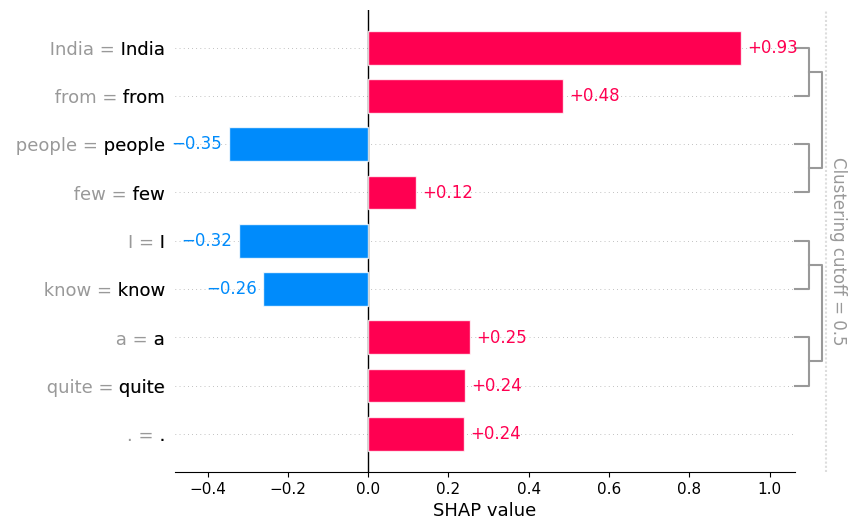

In [117]:
shap.plots.bar(shap_values[0, :, "spicy"])

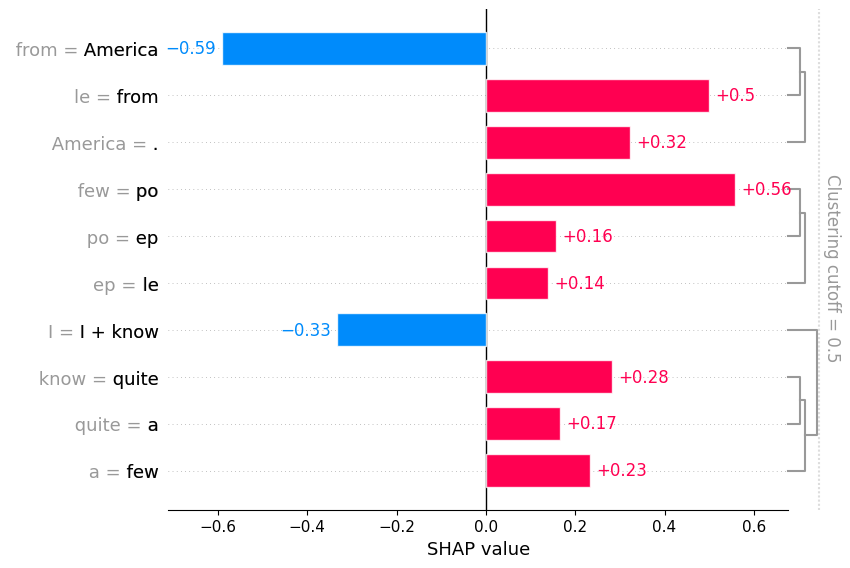

In [118]:
shap.plots.bar(shap_values[1, :, "spicy"])

# Interpretation of the results

The above bar plots show the shap values of the tokens with respect to teh word "spicy" and I couldn't agree more. Indians definitely love spicy food and americans don't which can be seen in the SHAP values being positive and negative for India and America respectively.

## Discussion: Choosing SHAP Over LIME and Anchors for GPT-2 Interpretability

### **Why SHAP?**

- Beacuse SHAP provides local explanations for individual predictions and is model-agnostic, making it suitable for interpreting complex models like GPT-2.
- Based on Shapley values from cooperative game theory, SHAP ensures a fair distribution of contribution among features.
- SHAP can handle feature dependencies, which is crucial in language models where word order and context matter.
- I like the visualisations inbuilt by SHAP

### **Comparison with LIME and Anchors**

- **LIME (Local Interpretable Model-agnostic Explanations):**
  - Generates local approximations but may not capture complex interactions as effectively as SHAP.
  - Relies on perturbations that may not be semantically meaningful in text data.
- **Anchors:**
  - Provides high-precision rules (anchors) but may not offer granular contributions of individual tokens.
  - I think it is better suited for classification tasks rather than language generation models.

Certainly! Here are the strengths, limitations, and potential improvements for using SHAP to interpret GPT-2 predictions:

---

## **Strengths, Limitations, and Potential Improvements of SHAP**


|                             |                                                                                                                                                                                                                                              |
|-----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Strengths**               | - **Fair Attribution:** Provides consistent and fair attribution of each token's contribution to the model's output using Shapley values.<br>- **Captures Complex Interactions:** Effectively handles feature dependencies and interactions, which are crucial in language models like GPT-2.<br>- **Model-Agnostic:** Applicable to any model without requiring internal modifications, making it versatile for various architectures. |
| **Limitations**             | - **Computationally Intensive:** Calculating SHAP values for large models like GPT-2 is resource-intensive and time-consuming.<br>- **Approximation Necessity:** May require approximations that could reduce the precision of explanations.<br>- **Interpretation Complexity:** The resulting explanations can be complex, requiring expertise to interpret effectively. |
| **Potential Improvements**  | - **Efficiency Enhancements:** Utilize sampling methods or approximate algorithms to reduce computation time while maintaining accuracy.<br>- **Improved Visualizations:** Develop more intuitive visualization tools tailored for NLP tasks to make interpretations more accessible.<br>- **Hybrid Approaches:** Combine SHAP with other interpretability techniques to enhance explanatory power and reduce complexity. |

## References

1. **Lundberg, S. M., & Lee, S.-I. (2017).** *A Unified Approach to Interpreting Model Predictions*. In *Advances in Neural Information Processing Systems* (pp. 4765–4774). [Link](https://papers.nips.cc/paper/7062-a-unified-approach-to-interpreting-model-predictions.pdf)

2. **Lundberg, S. M., Erion, G., & Lee, S.-I. (2018).** *Consistent Individualized Feature Attribution for Tree Ensembles*. In *Proceedings of the 2018 International Conference on Artificial Intelligence and Statistics* (pp. 187–195). [Link](http://proceedings.mlr.press/v80/lundberg18b/lundberg18b.pdf)

3. **Molnar, C. (2019).** *Interpretable Machine Learning: A Guide for Making Black Box Models Explainable*. [Online Book](https://christophm.github.io/interpretable-ml-book/)

4. SHAP code sample. [Link](https://shap.readthedocs.io/en/latest/example_notebooks/text_examples/text_generation/Open%20Ended%20GPT2%20Text%20Generation%20Explanations.html)

5. SHAP documentation for visualisation. [Link](https://shap.readthedocs.io/en/latest/api.html)

6. Hugging face for GPT2 model